<a href="https://colab.research.google.com/github/Razielo7/Razielo7/blob/main/AIDL_Assignment_abdualrhman_22s22453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/DataSet/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/DataSet/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/DataSet/train/true')))
print(len(os.listdir('/content/drive/MyDrive/DataSet/train/false')))
print(len(os.listdir('/content/drive/MyDrive/DataSet/test/true')))
print(len(os.listdir('/content/drive/MyDrive/DataSet/test/false')))

2219
2219
557
557


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3552 images belonging to 2 classes.
Found 886 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 770s 7s/step - accuracy: 0.5178 - loss: 0.7945 - val_accuracy: 0.5892 - val_loss: 0.6681
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 591s 5s/step - accuracy: 0.5999 - loss: 0.6557 - val_accuracy: 0.6208 - val_loss: 0.6679
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 548s 5s/step - accuracy: 0.6617 - loss: 0.6208 - val_accuracy: 0.6896 - val_loss: 0.5855
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 563s 5s/step - accuracy: 0.6933 - loss: 0.5782 - val_accuracy: 0.6490 - val_loss: 0.6180
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.7426 - loss: 0.5210 - val_accuracy: 0.6185 - val_loss: 0.6849


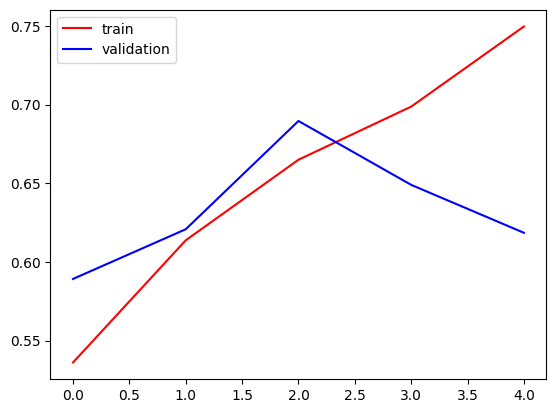

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

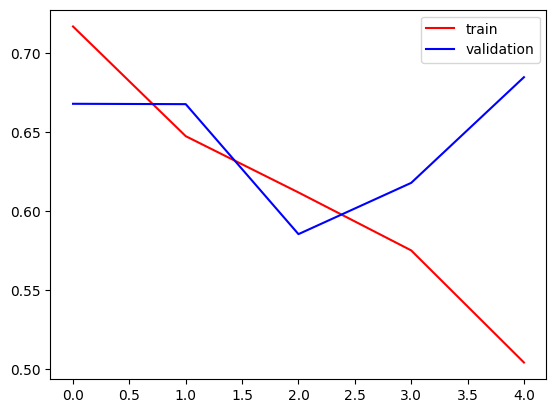

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1114 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

35/35 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step
[[0.03533014]
 [0.59766   ]
 [0.73349994]
 ...
 [0.10164101]
 [0.51133525]
 [0.6022351 ]]


In [13]:
len(predictions)

1114

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[278 279]
 [306 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       557
           1       0.47      0.45      0.46       557

    accuracy                           0.47      1114
   macro avg       0.47      0.47      0.47      1114
weighted avg       0.47      0.47      0.47      1114



In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 872s 8s/step - accuracy: 0.5489 - loss: 4.4830 - val_accuracy: 0.5451 - val_loss: 0.8255
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 919s 8s/step - accuracy: 0.5709 - loss: 1.0250 - val_accuracy: 0.5790 - val_loss: 0.7713
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 882s 7s/step - accuracy: 0.6179 - loss: 0.7167 - val_accuracy: 0.6106 - val_loss: 0.6783
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 904s 8s/step - accuracy: 0.6706 - loss: 0.6521 - val_accuracy: 0.6309 - val_loss: 0.6945
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 920s 8s/step - accuracy: 0.6765 - loss: 0.6287 - val_accuracy: 0.6535 - val_loss: 0.6885


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1114 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[234 323]
 [258 299]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       557
           1       0.48      0.54      0.51       557

    accuracy                           0.48      1114
   macro avg       0.48      0.48      0.48      1114
weighted avg       0.48      0.48      0.48      1114



In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = resnet_model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 1030s 9s/step - accuracy: 0.5075 - loss: 2.2615 - val_accuracy: 0.5102 - val_loss: 0.7338
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 1018s 9s/step - accuracy: 0.5600 - loss: 0.7026 - val_accuracy: 0.6095 - val_loss: 0.6563
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 1022s 9s/step - accuracy: 0.5484 - loss: 0.7182 - val_accuracy: 0.6129 - val_loss: 0.6448
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 1009s 9s/step - accuracy: 0.5957 - loss: 0.6632 - val_accuracy: 0.6072 - val_loss: 0.6496
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 1007s 9s/step - accuracy: 0.6269 - loss: 0.6401 - val_accuracy: 0.6095 - val_loss: 0.6574


In [24]:
predictions = resnet_model.predict(test_data)

35/35 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 84 473]
 [100 457]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.15      0.23       557
           1       0.49      0.82      0.61       557

    accuracy                           0.49      1114
   macro avg       0.47      0.49      0.42      1114
weighted avg       0.47      0.49      0.42      1114

